In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [3]:
digits = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L1/data/digits.csv")
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = digits['label']
X = np.array(digits.drop('label', axis = 1)).astype('float')
X.shape

(42000, 784)

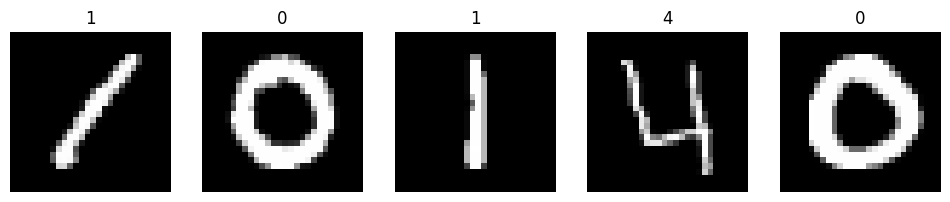

In [6]:
plt.figure(figsize = (12,4))
for i in range (5) :
  plt.subplot(1,5,i+1)
  plt.imshow(X[i].reshape(28,28), cmap = 'gray')
  plt.title(y[i])
  plt.axis('off')


In [7]:
from sklearn.model_selection import train_test_split
X/=255
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape , X_test.shape

((29400, 784), (12600, 784))

In [8]:
vanilla_model = MLPClassifier(random_state = 42)
vanilla_model.fit(X_train, y_train)
y_pred = vanilla_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9715873015873016


In [10]:
parameters = {
    'hidden_layer_sizes' : [50,100,200],
    'alpha' : [0.001,.01,0.1],
    'max_iter' :  [200,500,800],
    'learning_rate_init' : [0.0001, 0.001, 0.01, 0.1]
}
model = MLPClassifier()
clf = RandomizedSearchCV(model, parameters, cv = 5)
clf.fit(X_train[:3000],y_train[:3000])
print(clf.best_params_)
best_model = clf.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

{'max_iter': 500, 'learning_rate_init': 0.001, 'hidden_layer_sizes': 200, 'alpha': 0.001}


In [11]:
y_pred = best_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9293650793650794
